Prediction Using Unsupervised Machine Learning
From the given Iris dataset, predict the optimum number of clusters(K-Means) and represent it visually.

In [101]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [97]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [98]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [99]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Using below meathod To find number of clusters using KMeans

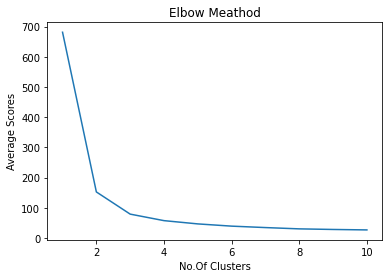

In [109]:
sse = []
for m in range(1,11):
    kmean = KMeans(n_clusters = m, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(iris['data'])
    sse.append(kmean.inertia_)
plt.plot(range(1,11),sse)
plt.title("Elbow Meathod")
plt.xlabel('No.Of Clusters')
plt.ylabel('Average Scores')
plt.show()

From the above graph we can say that elbow point is 3 so No.Of optimim cluster is 3.

In [110]:
model = KMeans(n_clusters = 3)
model.fit(iris['data'])

KMeans(n_clusters=3)

In [114]:
data.target = model.labels_
d1 = data[data.target == 0]
d2 = data[data.target == 1]
d3 = data[data.target == 2]

In [115]:
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Plotting the graph for iris Data set

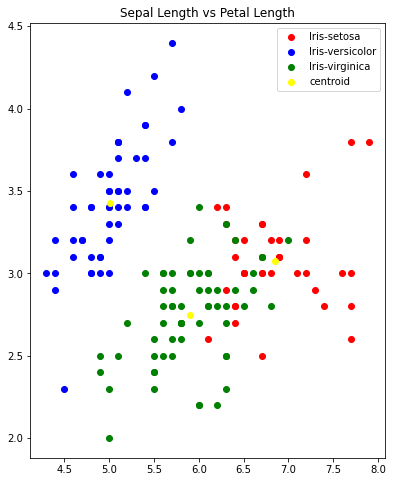

In [117]:
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.scatter(d1[['sepal length (cm)']], d1[['sepal width (cm)']], color = 'red', label = 'Iris-setosa')
plt.scatter(d2[['sepal length (cm)']], d2[['sepal width (cm)']], color = 'blue', label = 'Iris-versicolor')
plt.scatter(d3[['sepal length (cm)']], d3[['sepal width (cm)']], color = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,[0]], model.cluster_centers_[:,[1]], color = 'yellow', label = 'centroid')
plt.title('Sepal Length vs Petal Length')
plt.legend()